In [1]:
from ITMO.LinearRegression.main import *
from ITMO.util import normalize

In [2]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

In [3]:
model1 = LinearRegression(GradientDescend(cost_function=mse,
                                          learning_rate=3,
                                          max_iterations=1000,
                                          convergence=1e-8),
                          normalize=True)
model2 = LinearRegression(DifferentialEvolution(cost_function=mse,
                                                population_size=8,
                                                differential_weight=0.8,
                                                crossover_probability=0.9,
                                                max_iterations=300,
                                                convergence=1e-8),
                          normalize=True)

In [4]:
all_samples = make_dataset(read_csv('data.csv', ',', skip_header=True))

model = LinearRegression(DifferentialEvolution(mse, 8, 0.8, 0.9, 300, 1e-8), normalize=True)

model.fit(all_samples)
self_predict = model.predict_dataset(all_samples)
print(rmse(all_samples, self_predict))

63926.2082499


In [5]:
minmax = lambda x: (min(x), max(x))

In [6]:
all_normalized = copy.deepcopy(all_samples)

normalized_coords = [
    normalize(np.array([sample.coords[i] for sample in all_samples]))[0]
    for i in range(all_samples[0].coords.size)
]
normalized_targets = normalize(np.array([float(sample.target) for sample in all_samples], dtype=np.float))[0]

for idx, sample in enumerate(all_normalized):
    for j in range(sample.coords.size):
        all_normalized[idx].coords[j] = normalized_coords[j][idx]
    all_normalized[idx].target = normalized_targets[idx]

In [7]:
def plot_model(model, samples, steps=20, plot_type=('model', 'dataset')):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    if 'model' in plot_type:
        min_x, max_x = minmax([sample.coords[0] for sample in samples])
        min_y, max_y = minmax([sample.coords[1] for sample in samples])
        min_z, max_z = minmax([sample.target for sample in samples])

        X = np.arange(min_x, max_x, (max_x-min_x)/steps)
        Y = np.arange(min_y, max_y, (max_y-min_y)/steps)

        X, Y = np.meshgrid(X, Y)
        Z = np.array([
            [model.predict_one(np.array([X[i][j], Y[i][j]])) for j in range(X.shape[0])] 
            for i in range(X.shape[0])
        ])

        surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

        ax.set_zlim(min_z - 0.05*min_z, max_z + 0.05*max_z)
    
        ax.zaxis.set_major_locator(LinearLocator(10))
        ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    
    if 'dataset' in plot_type:
        X = np.array([sample.coords[0] for sample in samples])
        Y = np.array([sample.coords[1] for sample in samples])
        Z = np.array([sample.target for sample in samples])

        ax.scatter(X, Y, Z)
    
    plt.show()

<IPython.core.display.Javascript object>


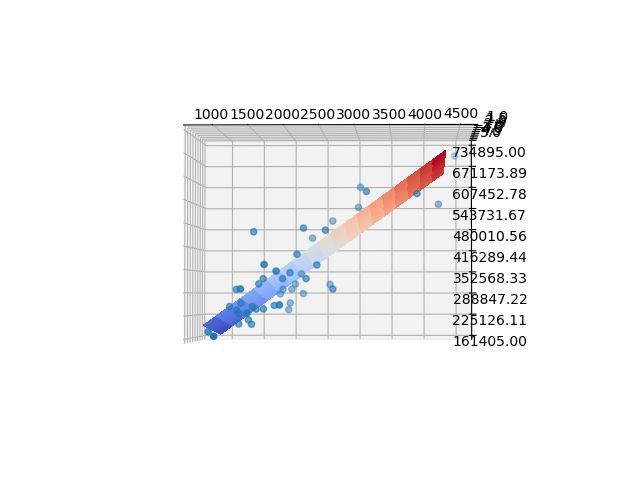

In [8]:
plot_model(model, all_samples)

In [33]:
def plot_mse(samples):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    X = np.arange(-2, 3, 0.1)
    Y = np.arange(-2, 3, 0.1)
    X, Y = np.meshgrid(X, Y)
    
    targets = [sample.target for sample in samples]
    Z = np.array([
        [
            mse(targets, [sample.coords[0] * X[i][j] + sample.coords[1] * Y[i][j] for sample in samples]) 
            for j in range(X.shape[0])
        ] for i in range(X.shape[0])
    ])
    
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

    ax.set_zlim(min(Z.flatten()), max(Z.flatten()))
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    
    plt.show()

<IPython.core.display.Javascript object>


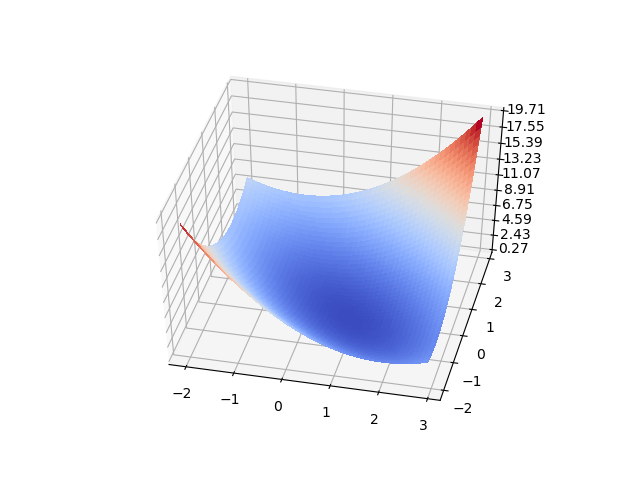

In [34]:
plot_mse(all_normalized)